In [1]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from train import *
from morphamizer import create_morphamaized_file
from utils import get_strongest_words
import utils
import morphamizer as morph
from evaluate_sentiment import Evaluator
from classifiers import *



In [2]:
TEST_PATH = r'data\test_tweet_data_labeld_final_morph_yap.tsv'

TRAIN_PATH = r'data\train_tweet_data_labeld_final_morph_yap.tsv'
train_path = TRAIN_PATH
test_path = TEST_PATH

train=True
to_morph=False
print_info=True
with_stat=True
save_model_f=False

2.0    368
0.0    163
1.0     76
Name: label, dtype: int64
2.0    0.606260
0.0    0.268534
1.0    0.125206
Name: label, dtype: float64


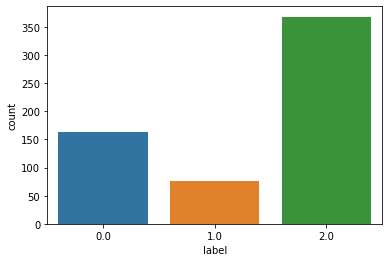

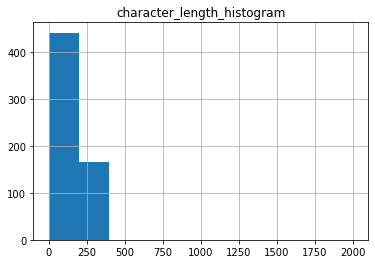

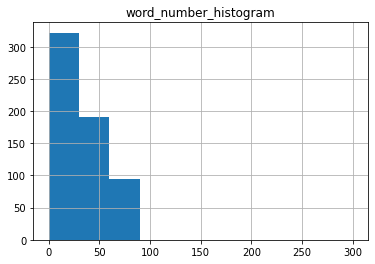

['של', 'את', 'זה', 'אני']


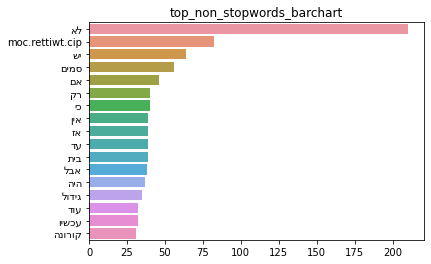

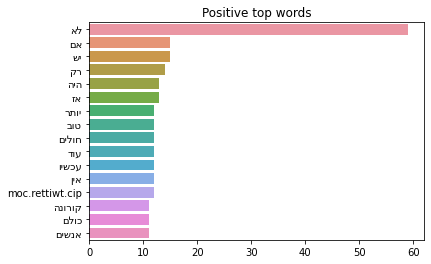

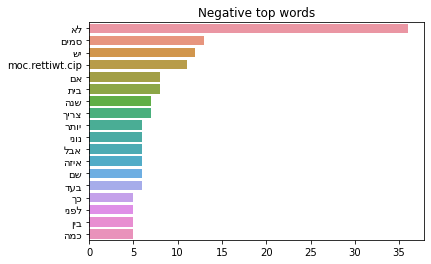

The Majority Classifier's results are: 
Micro precision:0.2679738562091503, recall:0.2679738562091503, f1:0.2679738562091503
Macro precision:0.08932461873638343, recall:0.3333333333333333, f1:0.140893470790378
[[41  0  0]
 [20  0  0]
 [92  0  0]]
Accuracy: 0.2679738562091503


The Throw a die Classifier's results are: 
Micro precision:0.21568627450980393, recall:0.21568627450980393, f1:0.21568627450980393
Macro precision:0.14044429176686135, recall:0.3536585365853659, f1:0.1979213198725394
[[23 18  0]
 [10 10  0]
 [49 43  0]]
Accuracy: 0.21568627450980393




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
train_df, test_df = data_acquisition(train_path, test_path, to_morph, print_info, with_stat)

X_train_counts, X_test_counts, X_train_tf, X_test_tfidf, count_vect = data_pre_processing(train_df.text, test_df.text)

evaluator = Evaluator(test_path, test_df)

# trying out different classifiers

# we wont save these thay are for baseline
majority_classifier(test_df, evaluator, 0)
throw_a_die_classifier(test_df, evaluator)

model_dict = get_all_Models(size=test_df.shape)
count = 0


In [4]:
for model in model_dict:
    clf, mic, mac, cm, acc, pred = train_eval_model(model_dict[model][utils.CLF], model, X_train_tf, train_df.label,
                                                    X_test_tfidf,
                                                    evaluator, error_analysis=print_info)
    model_dict = utils.update_dict(model_dict, model, clf, mic, mac, cm, acc, pred)

    count += 1
ngrams = [(1, 2), (1, 3)]
for ngram in ngrams:
    modles = get_all_Models(size=test_df.shape)

    X_train_tf, X_test_tfidf = ngram_text_tf_idf(train_df.text, test_df.text, ngram)

    for model in modles:
        model_name = model + str(ngram)
        clf, mic, mac, cm, acc, pred = train_eval_model(modles[model][utils.CLF], model_name, X_train_tf, train_df.label,
                                                        X_test_tfidf, evaluator, error_analysis=print_info)
        model_dict[model_name] = {utils.CLF: clf}
        model_dict = utils.update_dict(model_dict, model_name, clf, mic, mac, cm, acc, pred)

        count += 1

TheDecisionTreeRegressor's results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.49292786421499296, recall:0.47476139978791093, f1:0.4805651256370587
[[19  2 20]
 [ 5  4 11]
 [14  8 70]]
Accuracy: 0.6078431372549019


TheMultinomialNB's results are: 
Micro precision:0.6143790849673203, recall:0.6143790849673203, f1:0.6143790849673203
Macro precision:0.5364238410596026, recall:0.34959349593495936, f1:0.2834083006348295
[[ 2  0 39]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6143790849673203




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression's results are: 
Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.4603174603174603, recall:0.4407917992223401, f1:0.42319508448540705
[[15  0 26]
 [ 2  0 18]
 [ 4  0 88]]
Accuracy: 0.673202614379085


TheRandomForestClassifier's results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.8102139406487231, recall:0.42856132909155176, f1:0.4230503795721187
[[11  0 30]
 [ 0  1 19]
 [ 3  0 89]]
Accuracy: 0.6601307189542484


TheSVC's results are: 
Micro precision:0.6862745098039216, recall:0.6862745098039216, f1:0.6862745098039216
Macro precision:0.46888734674994215, recall:0.45254506892895013, f1:0.43538092865447126
[[16  0 25]
 [ 3  0 17]
 [ 3  0 89]]
Accuracy: 0.6862745098039216


TheLogisticRegressionNone's results are: 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.4820176902536715, recall:0.4567338282078473, f1:0.463323871573824
[[15  2 24]
 [ 7  4  9]
 [10  8 74]]
Accuracy: 0.6078431372549019


TheDecisionTreeRegressor(1, 2)'s results are: 
Micro precision:0.6470588235294118, recall:0.6470588235294118, f1:0.6470588235294118
Macro precision:0.5043039842597147, recall:0.4794273594909862, f1:0.47944060265159427
[[21  2 18]
 [ 5  2 13]
 [12  4 76]]
Accuracy: 0.6470588235294118


TheMultinomialNB(1, 2)'s results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.5350877192982456, recall:0.34146341463414637, f1:0.2672391360915951
[[ 1  0 40]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6078431372549019




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression(1, 2)'s results are: 
Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.49264705882352944, recall:0.43628490632732414, f1:0.42115345835854007
[[14  0 27]
 [ 0  0 20]
 [ 3  0 89]]
Accuracy: 0.673202614379085




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier(1, 2)'s results are: 
Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.8150448585231193, recall:0.435807705903146, f1:0.42884748102139403
[[11  0 30]
 [ 2  1 17]
 [ 1  0 91]]
Accuracy: 0.673202614379085


TheSVC(1, 2)'s results are: 
Micro precision:0.6993464052287581, recall:0.6993464052287581, f1:0.6993464052287581
Macro precision:0.8088768115942028, recall:0.4903852951572994, f1:0.5043560606060606
[[17  0 24]
 [ 2  2 16]
 [ 4  0 88]]
Accuracy: 0.6993464052287581


TheLogisticRegressionNone(1, 2)'s results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.47189638318670574, recall:0.44369034994697776, f1:0.4489136413641364
[[15  2 24]
 [ 6  3 11]
 [10  7 75]]
Accuracy: 0.6078431372549019


TheDecisionTreeRegressor(1, 3)'s results are: 
Micro precision:0.5882352941176471, recall:0.5882352941176471, f1:0.5882352941176471
Macro precision:0.5011773054220

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression(1, 3)'s results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.4705882352941176, recall:0.4245316366207141, f1:0.40673522887678965
[[13  0 28]
 [ 0  0 20]
 [ 4  0 88]]
Accuracy: 0.6601307189542484




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier(1, 3)'s results are: 
Micro precision:0.6535947712418301, recall:0.6535947712418301, f1:0.6535947712418301
Macro precision:0.803172846338314, recall:0.42043124779073876, f1:0.41205707872374536
[[10  0 31]
 [ 0  1 19]
 [ 3  0 89]]
Accuracy: 0.6535947712418301


TheSVC(1, 3)'s results are: 
Micro precision:0.7058823529411765, recall:0.7058823529411765, f1:0.7058823529411765
Macro precision:0.8143044619422573, recall:0.49851537645811245, f1:0.5131057679002885
[[18  0 23]
 [ 2  2 16]
 [ 4  0 88]]
Accuracy: 0.7058823529411765


TheLogisticRegressionNone(1, 3)'s results are: 
Micro precision:0.6405228758169934, recall:0.6405228758169934, f1:0.6405228758169934
Macro precision:0.5228650137741047, recall:0.4527925061859314, f1:0.46088382144720175
[[13  2 26]
 [ 4  3 13]
 [ 5  5 82]]
Accuracy: 0.6405228758169934




In [5]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
kf =KFold(n_splits=5, random_state=42) 


C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [6]:
train_df.head()

,text,label
0,תתעודדו ! לפחות תקבלו לגליזציה !,0.0
1,אם הייתה כבר לגליזציה ה סגר ה זה היה עובד ל את...,0.0
2,ה מרכז ל בקרת תחלואה בארה ב CDC מזהיר חולים מו...,0.0
3,לבנון עשתה לגליזציה של גידול קנאביס לפני אנחנו...,0.0
4,אוגרים קנאביס לקראת הסגר עלייה ב מכירות ב טלגרם,0.0


In [7]:
train_df.iloc[[1,2,3]]

,text,label
1,אם הייתה כבר לגליזציה ה סגר ה זה היה עובד ל את...,0.0
2,ה מרכז ל בקרת תחלואה בארה ב CDC מזהיר חולים מו...,0.0
3,לבנון עשתה לגליזציה של גידול קנאביס לפני אנחנו...,0.0


In [8]:
for train_index, test_index in kf.split(train_df):
    
#     print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = train_df.text[train_index], train_df.text[test_index] 
    y_train, y_test = train_df.label[train_index], train_df.label[test_index]
        
        
        
    X_train_counts, X_test_counts, X_train_tf, X_test_tfidf, count_vect = data_pre_processing(X_train, X_test)

    evaluator = Evaluator(test_path, train_df.iloc[test_index])
    
    
    
    majority_classifier(train_df.iloc[test_index], evaluator, 0)
    
    
    
    throw_a_die_classifier(train_df.iloc[test_index], evaluator)

    model_dict = get_all_Models(size=train_df.iloc[test_index].shape)
    count = 0
    for model in model_dict:
        clf, mic, mac, cm, acc, pred = train_eval_model(model_dict[model][utils.CLF], model, X_train_tf, y_train,
                                                        X_test_tfidf,
                                                        evaluator, error_analysis=print_info)
        model_dict = utils.update_dict(model_dict, model, clf, mic, mac, cm, acc, pred)

        count += 1


The Majority Classifier's results are: 
Micro precision:1.0, recall:1.0, f1:1.0
Macro precision:1.0, recall:1.0, f1:1.0
[[122]]
Accuracy: 1.0


The Throw a die Classifier's results are: 
Micro precision:0.5163934426229508, recall:0.5163934426229508, f1:0.5163934426229508
Macro precision:0.5, recall:0.2581967213114754, f1:0.34054054054054056
[[63 59]
 [ 0  0]]
Accuracy: 0.5163934426229508


TheDecisionTreeRegressor's results are: 
Micro precision:0.07377049180327869, recall:0.07377049180327869, f1:0.07377049180327869

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_cl


Macro precision:0.3333333333333333, recall:0.02459016393442623, f1:0.04580152671755725
[[ 9 18 95]
 [ 0  0  0]
 [ 0  0  0]]
Accuracy: 0.07377049180327869


TheMultinomialNB's results are: 
Micro precision:0.0, recall:0.0, f1:0.0
Macro precision:0.0, recall:0.0, f1:0.0
[[  0 122]
 [  0   0]]
Accuracy: 0.0


TheLogisticRegression's results are: 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro precision:0.0, recall:0.0, f1:0.0
Macro precision:0.0, recall:0.0, f1:0.0
[[  0   1 121]
 [  0   0   0]
 [  0   0   0]]
Accuracy: 0.0


TheRandomForestClassifier's results are: 
Micro precision:0.00819672131147541, recall:0.00819672131147541, f1:0.00819672131147541
Macro precision:0.5, recall:0.004098360655737705, f1:0.008130081300813009
[[  1 121]
 [  0   0]]
Accuracy: 0.00819672131147541


TheSVC's results are: 
Micro precision:0.00819672131147541, recall:0.00819672131147541, f1:0.00819672131147541
Macro precision:0.5, recall:0.004098360655737705, f1:0.008130081300813009
[[  1 121]
 [  0   0]]
Accuracy: 0.00819672131147541


TheLogisticRegressionNone's results are: 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro precision:0.040983606557377046, recall:0.040983606557377046, f1:0.040983606557377046
Macro precision:0.3333333333333333, recall:0.01366120218579235, f1:0.026246719160104987
[[  5  13 104]
 [  0   0   0]
 [  0   0   0]]
Accuracy: 0.040983606557377046


The Majority Classifier's results are: 
Micro precision:0.3360655737704918, recall:0.3360655737704918, f1:0.3360655737704918
Macro precision:0.11202185792349727, recall:0.3333333333333333, f1:0.16768916155419222
[[41  0  0]
 [76  0  0]
 [ 5  0  0]]
Accuracy: 0.3360655737704918


The Throw a die Classifier's results are: 
Micro precision:0.4918032786885246, recall:0.4918032786885246, f1:0.4918032786885246
Macro precision:0.3232758620689655, recall:0.33804022250748816, f1:0.32515632515632514
[[20 21  0]
 [36 40  0]
 [ 2  3  0]]
Accuracy: 0.4918032786885246


TheDecisionTreeRegressor's results are: 
Micro precision:0.18032786885245902, recall:0.18032786885245902, f1:0.18032786885245905
Macro precision:0.14757094757094757, recall:0.471

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\met

TheRandomForestClassifier's results are: 
Micro precision:0.05737704918032787, recall:0.05737704918032787, f1:0.05737704918032787
Macro precision:0.1807909604519774, recall:0.34959349593495936, f1:0.05672990063233966
[[ 2  0 39]
 [ 2  0 74]
 [ 0  0  5]]
Accuracy: 0.05737704918032787


TheSVC's results are: 
Micro precision:0.12295081967213115, recall:0.12295081967213115, f1:0.12295081967213115
Macro precision:0.2119514472455649, recall:0.4146341463414634, f1:0.14524555903866246
[[10  0 31]
 [ 7  0 69]
 [ 0  0  5]]
Accuracy: 0.12295081967213115


TheLogisticRegressionNone's results are: 
Micro precision:0.14754098360655737, recall:0.14754098360655737, f1:0.14754098360655737
Macro precision:0.17803768680961662, recall:0.43902439024390244, f1:0.1607843137254902
[[13  0 28]
 [14  0 62]
 [ 0  0  5]]
Accuracy: 0.14754098360655737


The Majority Classifier's results are: 
Micro precision:0.0, recall:0.0, f1:0.0
Macro precision:0.0, recall:0.0, f1:0.0
[[  0   0]
 [121   0]]
Accuracy: 0.0


The

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\skl

TheDecisionTreeRegressor's results are: 
Micro precision:0.6859504132231405, recall:0.6859504132231405, f1:0.6859504132231405
Macro precision:0.3333333333333333, recall:0.22865013774104684, f1:0.27124183006535946
[[ 0  0  0]
 [ 0  0  0]
 [33  5 83]]
Accuracy: 0.6859504132231405


TheMultinomialNB's results are: 
Micro precision:0.9917355371900827, recall:0.9917355371900827, f1:0.9917355371900827
Macro precision:0.5, recall:0.49586776859504134, f1:0.4979253112033195
[[  0   0]
 [  1 120]]
Accuracy: 0.9917355371900827


TheLogisticRegression's results are: 
Micro precision:0.8429752066115702, recall:0.8429752066115702, f1:0.8429752066115702
Macro precision:0.5, recall:0.4214876033057851, f1:0.4573991031390135
[[  0   0]
 [ 19 102]]
Accuracy: 0.8429752066115702




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier's results are: 
Micro precision:0.9173553719008265, recall:0.9173553719008265, f1:0.9173553719008265
Macro precision:0.5, recall:0.45867768595041325, f1:0.478448275862069
[[  0   0]
 [ 10 111]]
Accuracy: 0.9173553719008265


TheSVC's results are: 
Micro precision:0.8677685950413223, recall:0.8677685950413223, f1:0.8677685950413223
Macro precision:0.5, recall:0.43388429752066116, f1:0.4646017699115044
[[  0   0]
 [ 16 105]]
Accuracy: 0.8677685950413223


TheLogisticRegressionNone's results are: 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro precision:0.7520661157024794, recall:0.7520661157024794, f1:0.7520661157024794
Macro precision:0.3333333333333333, recall:0.2506887052341598, f1:0.2861635220125786
[[ 0  0  0]
 [ 0  0  0]
 [25  5 91]]
Accuracy: 0.7520661157024794


The Majority Classifier's results are: 
Micro precision:0.0, recall:0.0, f1:0.0
Macro precision:0.0, recall:0.0, f1:0.0
[[  0   0]
 [121   0]]
Accuracy: 0.0


The Throw a die Classifier's results are: 
Micro precision:0.0, recall:0.0, f1:0.0
Macro precision:0.0, recall:0.0, f1:0.0
[[ 0  0  0]
 [ 0  0  0]
 [56 65  0]]
Accuracy: 0.0


TheDecisionTreeRegressor's results are: 
Micro precision:0.7107438016528925, recall:0.7107438016528925, f1:0.7107438016528925
Macro precision:0.3333333333333333, recall:0.23691460055096417, f1:0.27697262479871176
[[ 0  0  0]
 [ 0  0  0]
 [28  7 86]]
Accuracy: 0.7107438016528925


TheMultinomialNB's results are: 
Micro precision:0.9752066115702479, recall:0.9752066115702479, f1:0.9752066115702479
Macro precision:0.5, recall

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_cl

TheLogisticRegression's results are: 
Micro precision:0.8181818181818182, recall:0.8181818181818182, f1:0.8181818181818182
Macro precision:0.3333333333333333, recall:0.27272727272727276, f1:0.3
[[ 0  0  0]
 [ 0  0  0]
 [21  1 99]]
Accuracy: 0.8181818181818182




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier's results are: 
Micro precision:0.8512396694214877, recall:0.8512396694214877, f1:0.8512396694214878
Macro precision:0.5, recall:0.4256198347107438, f1:0.4598214285714286
[[  0   0]
 [ 18 103]]
Accuracy: 0.8512396694214877


TheSVC's results are: 
Micro precision:0.8429752066115702, recall:0.8429752066115702, f1:0.8429752066115702
Macro precision:0.5, recall:0.4214876033057851, f1:0.4573991031390135
[[  0   0]
 [ 19 102]]
Accuracy: 0.8429752066115702


TheLogisticRegressionNone's results are: 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro precision:0.7603305785123967, recall:0.7603305785123967, f1:0.7603305785123967
Macro precision:0.3333333333333333, recall:0.2534435261707989, f1:0.28794992175273865
[[ 0  0  0]
 [ 0  0  0]
 [24  5 92]]
Accuracy: 0.7603305785123967


The Majority Classifier's results are: 
Micro precision:0.0, recall:0.0, f1:0.0
Macro precision:0.0, recall:0.0, f1:0.0
[[  0   0]
 [121   0]]
Accuracy: 0.0


The Throw a die Classifier's results are: 
Micro precision:0.0, recall:0.0, f1:0.0
Macro precision:0.0, recall:0.0, f1:0.0
[[ 0  0  0]
 [ 0  0  0]
 [59 62  0]]
Accuracy: 0.0


TheDecisionTreeRegressor's results are: 
Micro precision:0.7272727272727273, recall:0.7272727272727273, f1:0.7272727272727273
Macro precision:0.3333333333333333, recall:0.24242424242424243, f1:0.28070175438596495
[[ 0  0  0]
 [ 0  0  0]
 [27  6 88]]
Accuracy: 0.7272727272727273


TheMultinomialNB's results are: 
Micro precision:0.9504132231404959, recall:0.9504132231404959, f1:0.9504132231404959
Macro precision:0.5, recal

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_cl

TheLogisticRegression's results are: 
Micro precision:0.9008264462809917, recall:0.9008264462809917, f1:0.9008264462809917
Macro precision:0.5, recall:0.45041322314049587, f1:0.4739130434782609
[[  0   0]
 [ 12 109]]
Accuracy: 0.9008264462809917




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier's results are: 
Micro precision:0.9090909090909091, recall:0.9090909090909091, f1:0.9090909090909091
Macro precision:0.5, recall:0.45454545454545453, f1:0.47619047619047616
[[  0   0]
 [ 11 110]]
Accuracy: 0.9090909090909091


TheSVC's results are: 
Micro precision:0.9008264462809917, recall:0.9008264462809917, f1:0.9008264462809917
Macro precision:0.3333333333333333, recall:0.3002754820936639, f1:0.3159420289855073
[[  0   0   0]
 [  0   0   0]
 [ 11   1 109]]
Accuracy: 0.9008264462809917


TheLogisticRegressionNone's results are: 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro precision:0.7355371900826446, recall:0.7355371900826446, f1:0.7355371900826446
Macro precision:0.3333333333333333, recall:0.24517906336088155, f1:0.28253968253968254
[[ 0  0  0]
 [ 0  0  0]
 [23  9 89]]
Accuracy: 0.7355371900826446




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.0    368
0.0    163
1.0     76
Name: label, dtype: int64
2.0    0.606260
0.0    0.268534
1.0    0.125206
Name: label, dtype: float64


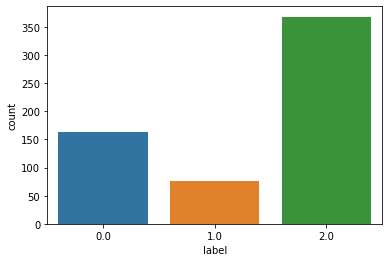

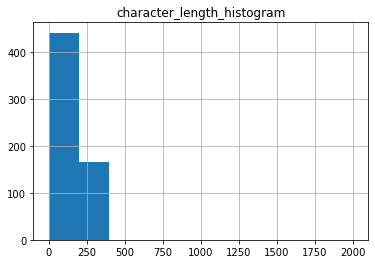

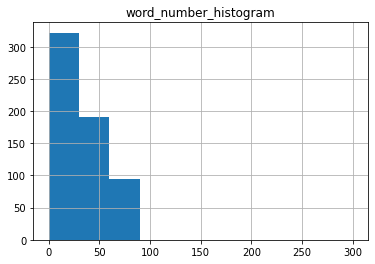

['של', 'את', 'זה', 'אני']


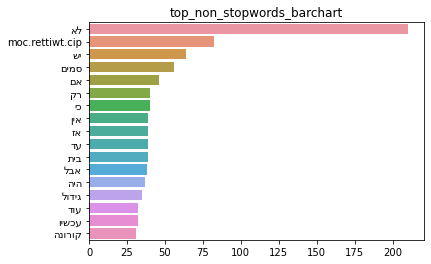

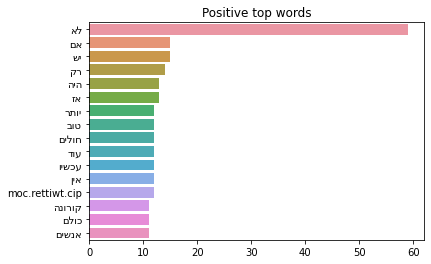

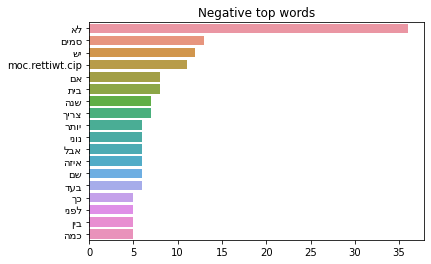

In [9]:
train_df, test_df = data_acquisition(train_path, test_path, to_morph, print_info, with_stat)

X_train_counts, X_test_counts, X_train_tf, X_test_tfidf, count_vect = data_pre_processing(train_df.text, test_df.text)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
evaluator = Evaluator(test_path, test_df)

In [10]:

for model in model_dict:
    print(model)
    clf, mic, mac, cm, acc, pred = train_eval_model(model_dict[model][utils.CLF], model, X_train_tf, train_df.label,
                                                    X_test_tfidf,
                                                    evaluator, error_analysis=print_info)
    model_dict = utils.update_dict(model_dict, model, clf, mic, mac, cm, acc, pred)
    scores = cross_val_score(model_dict[model][utils.CLF], X_train_tf, train_df.label, scoring='accuracy', cv=cv, n_jobs=-1)
    model_dict[model][utils.CROSS_VALIDATION]=np.mean(scores)
    count += 1
    



DecisionTreeRegressor
TheDecisionTreeRegressor's results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.5533348474524945, recall:0.5258041710851891, f1:0.5352583539363406
[[21  4 16]
 [ 4  5 11]
 [12  5 75]]
Accuracy: 0.6601307189542484


MultinomialNB
TheMultinomialNB's results are: 
Micro precision:0.6143790849673203, recall:0.6143790849673203, f1:0.6143790849673203
Macro precision:0.5364238410596026, recall:0.34959349593495936, f1:0.2834083006348295
[[ 2  0 39]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6143790849673203


LogisticRegression
TheLogisticRegression's results are: 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.4603174603174603, recall:0.4407917992223401, f1:0.42319508448540705
[[15  0 26]
 [ 2  0 18]
 [ 4  0 88]]
Accuracy: 0.673202614379085




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier
TheRandomForestClassifier's results are: 
Micro precision:0.6862745098039216, recall:0.6862745098039216, f1:0.6862745098039216
Macro precision:0.8263888888888888, recall:0.4651113467656416, f1:0.4769700248485316
[[13  0 28]
 [ 1  2 17]
 [ 2  0 90]]
Accuracy: 0.6862745098039216


SVC
TheSVC's results are: 
Micro precision:0.6862745098039216, recall:0.6862745098039216, f1:0.6862745098039216
Macro precision:0.46888734674994215, recall:0.45254506892895013, f1:0.43538092865447126
[[16  0 25]
 [ 3  0 17]
 [ 3  0 89]]
Accuracy: 0.6862745098039216




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegressionNone
TheLogisticRegressionNone's results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.4820176902536715, recall:0.4567338282078473, f1:0.463323871573824
[[15  2 24]
 [ 7  4  9]
 [10  8 74]]
Accuracy: 0.6078431372549019




In [ ]:
ngrams = [(1, 2), (1, 3)]
for ngram in ngrams:
    modles = get_all_Models(size=test_df.shape)

    X_train_tf, X_test_tfidf = ngram_text_tf_idf(train_df.text, test_df.text, ngram)

    for model in modles:
        model_name = model + str(ngram)
        clf, mic, mac, cm, acc, pred = train_eval_model(modles[model][utils.CLF], model_name, X_train_tf, train_df.label,
                                                        X_test_tfidf, evaluator, error_analysis=print_info)
        model_dict[model_name] = {utils.CLF: clf}
        model_dict = utils.update_dict(model_dict, model_name, clf, mic, mac, cm, acc, pred)
        scores = cross_val_score(model_dict[model][utils.CLF], X_train_tf, train_df.label, scoring='accuracy', cv=cv, n_jobs=-1)
        model_dict[model_name][utils.CROSS_VALIDATION]=np.mean(scores)
        count += 1

TheDecisionTreeRegressor(1, 2)'s results are: 
Micro precision:0.6013071895424836, recall:0.6013071895424836, f1:0.6013071895424836
Macro precision:0.47907647907647904, recall:0.4576175326970661, f1:0.46398944266964576
[[16  3 22]
 [ 5  4 11]
 [12  8 72]]
Accuracy: 0.6013071895424836


TheMultinomialNB(1, 2)'s results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.5350877192982456, recall:0.34146341463414637, f1:0.2672391360915951
[[ 1  0 40]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6078431372549019




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression(1, 2)'s results are: 
Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.49264705882352944, recall:0.43628490632732414, f1:0.42115345835854007
[[14  0 27]
 [ 0  0 20]
 [ 3  0 89]]
Accuracy: 0.673202614379085




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier(1, 2)'s results are: 
Micro precision:0.6666666666666666, recall:0.6666666666666666, f1:0.6666666666666666
Macro precision:0.8117831074035453, recall:0.4452279957582184, f1:0.45303691941246527
[[11  0 30]
 [ 0  2 18]
 [ 3  0 89]]
Accuracy: 0.6666666666666666


TheSVC(1, 2)'s results are: 
Micro precision:0.6993464052287581, recall:0.6993464052287581, f1:0.6993464052287581
Macro precision:0.8088768115942028, recall:0.4903852951572994, f1:0.5043560606060606
[[17  0 24]
 [ 2  2 16]
 [ 4  0 88]]
Accuracy: 0.6993464052287581


TheLogisticRegressionNone(1, 2)'s results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.47189638318670574, recall:0.44369034994697776, f1:0.4489136413641364
[[15  2 24]
 [ 6  3 11]
 [10  7 75]]
Accuracy: 0.6078431372549019


TheDecisionTreeRegressor(1, 3)'s results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.45352881

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression(1, 3)'s results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.4705882352941176, recall:0.4245316366207141, f1:0.40673522887678965
[[13  0 28]
 [ 0  0 20]
 [ 4  0 88]]
Accuracy: 0.6601307189542484




C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheRandomForestClassifier(1, 3)'s results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.8469483568075118, recall:0.41954754330151994, f1:0.4086523498288204
[[ 9  0 32]
 [ 0  1 19]
 [ 1  0 91]]
Accuracy: 0.6601307189542484


TheSVC(1, 3)'s results are: 
Micro precision:0.7058823529411765, recall:0.7058823529411765, f1:0.7058823529411765
Macro precision:0.8143044619422573, recall:0.49851537645811245, f1:0.5131057679002885
[[18  0 23]
 [ 2  2 16]
 [ 4  0 88]]
Accuracy: 0.7058823529411765


TheLogisticRegressionNone(1, 3)'s results are: 
Micro precision:0.6405228758169934, recall:0.6405228758169934, f1:0.6405228758169934
Macro precision:0.5228650137741047, recall:0.4527925061859314, f1:0.46088382144720175
[[13  2 26]
 [ 4  3 13]
 [ 5  5 82]]
Accuracy: 0.6405228758169934




In [ ]:
df_dict=pd.DataFrame.from_dict(model_dict)
df_dict


In [ ]:
model_dict

In [ ]:
for model in model_dict:
    print(f" model = {model}" ,end = ' ')
    print(f"cv={model_dict[model][utils.CROSS_VALIDATION]}")

In [ ]:
get_best_model(model_dict,micro_macro=None,measurement=utils.CROSS_VALIDATION)

In [ ]:

def get_best_model(model_dict, micro_macro=utils.MICRO, measurement=utils.F1):
    """ find best model under mesuement """
    target = 0
    best = None
    name = None
    if micro_macro = None:
        
        for model in model_dict:
            if model_dict[model][measurement] > target:
                target = model_dict[model][measurement]
                best = model_dict[model]
                name = model
        pred = model_dict[name][utils.PREDICTION]
        return best, name, pred

    for model in model_dict:
        if model_dict[model][micro_macro][measurement] > target:
            target = model_dict[model][micro_macro][measurement]
            best = model_dict[model]
            name = model
    pred = model_dict[name][utils.PREDICTION]
    return best, name, pred
